# Global Solution - Dynamic Programming

Jean Matheus Mohamed de Oliveira - RM555519

Pedro Henrique Ribeiro Sampaio - RM555613

## Importações, Dados Mestre, Grafo e Validação

- Implementação inicial das estruturas obrigatórias: grafo direcionado ponderado, dicionários, listas, heaps, conjuntos.

- Dados mestre baseados na tabela do PDF, com IDs únicos.

In [37]:
import random
import itertools
import heapq
from collections import defaultdict, deque

# Dados Mestre (Base)
skills = {
    'S1': {'Nome': 'Programação Básica (Python)', 'Tempo': 80, 'Valor': 3, 'Complexidade': 4, 'Pre_Reqs': []},
    'S2': {'Nome': 'Modelagem de Dados (SQL)', 'Tempo': 60, 'Valor': 4, 'Complexidade': 3, 'Pre_Reqs': []},
    'S3': {'Nome': 'Algoritmos Avançados', 'Tempo': 100, 'Valor': 7, 'Complexidade': 8, 'Pre_Reqs': ['S1']},
    'S4': {'Nome': 'Fundamentos de Machine Learning', 'Tempo': 120, 'Valor': 8, 'Complexidade': 9, 'Pre_Reqs': ['S1', 'S3']},
    'S5': {'Nome': 'Visualização de Dados (BI)', 'Tempo': 40, 'Valor': 6, 'Complexidade': 5, 'Pre_Reqs': ['S2']},
    'S6': {'Nome': 'IA Generativa Ética', 'Tempo': 150, 'Valor': 10, 'Complexidade': 10, 'Pre_Reqs': ['S4']},
    'S7': {'Nome': 'Estruturas em Nuvem (AWS/Azure)', 'Tempo': 70, 'Valor': 5, 'Complexidade': 7, 'Pre_Reqs': []},
    'S8': {'Nome': 'APIs e Microsserviços', 'Tempo': 90, 'Valor': 6, 'Complexidade': 6, 'Pre_Reqs': ['S1']},
    'S9': {'Nome': 'DevOps & CI/CD', 'Tempo': 110, 'Valor': 9, 'Complexidade': 8, 'Pre_Reqs': ['S7', 'S8']},
    'H10': {'Nome': 'Segurança de Dados', 'Tempo': 60, 'Valor': 5, 'Complexidade': 6, 'Pre_Reqs': []},
    'H11': {'Nome': 'Análise de Big Data', 'Tempo': 90, 'Valor': 8, 'Complexidade': 8, 'Pre_Reqs': ['S4']},
    'H12': {'Nome': 'Introdução a IoT', 'Tempo': 30, 'Valor': 3, 'Complexidade': 3, 'Pre_Reqs': []}
}

# Grafo direcionado: nós = habilidades; arestas = pré-requisitos
graph = {skill: data['Pre_Reqs'] for skill, data in skills.items()}

# Função de validação do grafo
def validate_graph(graph):
    visited = set()
    rec_stack = set()
    def has_cycle(node):
        visited.add(node)
        rec_stack.add(node)
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                if has_cycle(neighbor):
                    return True
            elif neighbor in rec_stack:
                return True
        rec_stack.remove(node)
        return False

    for node in graph:
        if node not in visited:
            if has_cycle(node):
                raise ValueError(f"Ciclo detectado envolvendo {node}. Interrompendo.")

    all_nodes = set(graph.keys())
    for node, prereqs in graph.items():
        for prereq in prereqs:
            if prereq not in all_nodes:
                raise ValueError(f"Nó órfão: {prereq} é pré-requisito de {node} mas não existe.")

    print("Grafo validado: sem ciclos ou nós órfãos.")

validate_graph(graph)

Grafo validado: sem ciclos ou nós órfãos.


## Validação do Grafo

In [38]:
# Célula 2: Validação do Grafo
def validate_graph(graph):
    visited = set()
    rec_stack = set()
    def has_cycle(node):
        visited.add(node)
        rec_stack.add(node)
        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                if has_cycle(neighbor):
                    return True
            elif neighbor in rec_stack:
                return True
        rec_stack.remove(node)
        return False

    for node in graph:
        if node not in visited:
            if has_cycle(node):
                raise ValueError(f"Ciclo detectado envolvendo {node}. Interrompendo.")

    all_nodes = set(graph.keys())
    for node, prereqs in graph.items():
        for prereq in prereqs:
            if prereq not in all_nodes:
                raise ValueError(f"Nó órfão: {prereq} é pré-requisito de {node} mas não existe.")

    print("Grafo validado: sem ciclos ou nós órfãos.")

validate_graph(graph)

Grafo validado: sem ciclos ou nós órfãos.


## Desafio 1: Caminho de Valor Máximo

- Modela como DP multidimensional (knapsack: tempo e complexidade).

- Simula incerteza com Monte Carlo (1000 cenários, V ~ Uniforme[V-10%, V+10%]).

- Maximiza E[Valor total] e calcula desvio-padrão.

- Compara com solução determinística.

- Complexidade: O(n * T * C), onde n=12, T=350, C=30 (factível).

In [39]:
def desafio1():
    global values_mc  # Para o histograma funcionar
    target_skills = [s for s in skills if s != 'S6'] + ['S6']
    n = len(target_skills)
    T_max = 350
    C_max = 30

    dp = [[0 for _ in range(C_max + 1)] for _ in range(T_max + 1)]
    selected = [[[] for _ in range(C_max + 1)] for _ in range(T_max + 1)]

    for i in range(n):
        skill = target_skills[i]
        t = skills[skill]['Tempo']
        v = skills[skill]['Valor']
        c = skills[skill]['Complexidade']
        for time in range(T_max, t-1, -1):
            for comp in range(C_max, c-1, -1):
                if dp[time - t][comp - c] + v > dp[time][comp]:
                    dp[time][comp] = dp[time - t][comp - c] + v
                    selected[time][comp] = selected[time - t][comp - c] + [skill]

    max_val = max(max(row) for row in dp)
    best_path = None
    for t in range(T_max + 1):
        for c in range(C_max + 1):
            if dp[t][c] == max_val:
                best_path = selected[t][c]
                break
        if best_path:
            break

    values_mc = []
    for _ in range(1000):
        total_val = 0
        for skill in best_path:
            v_base = skills[skill]['Valor']
            v_sim = random.uniform(v_base * 0.9, v_base * 1.1)
            total_val += v_sim
        values_mc.append(total_val)

    e_val = sum(values_mc) / len(values_mc)
    std_val = (sum((v - e_val)**2 for v in values_mc) / len(values_mc))**0.5

    print("Desafio 1 - Caminho de Valor Máximo")
    print(f"Solução Determinística: Valor Máximo = {max_val}, Caminho = {best_path}")
    print(f"Monte Carlo: E[Valor] = {e_val:.2f}, Desvio-Padrão = {std_val:.2f}")
    print(f"Comparação: Determinístico vs Esperado = {max_val} vs {e_val:.2f}")

desafio1()

Desafio 1 - Caminho de Valor Máximo
Solução Determinística: Valor Máximo = 31, Caminho = ['S5', 'S9', 'H10', 'H11', 'H12']
Monte Carlo: E[Valor] = 31.05, Desvio-Padrão = 0.84
Comparação: Determinístico vs Esperado = 31 vs 31.05


## Desafio 2: Verificação Crítica

- Habilidades críticas: S3, S5, S7, S8, S9.

- Enumera 120 permutações (5! = 120).

- Calcula custo total: Tempo de Aquisição + Espera por pré-reqs (simula espera como soma de tempos de pré-reqs).

- Valida grafo antes (já feito globalmente).

- Compara custo médio das 3 melhores ordens.

In [40]:
def desafio2():
    critical = ['S3', 'S5', 'S7', 'S8', 'S9']
    permutations = list(itertools.permutations(critical))

    costs = []
    for perm in permutations:
        total_cost = 0
        acquired = set()
        for skill in perm:
            total_cost += skills[skill]['Tempo']
            for prereq in skills[skill]['Pre_Reqs']:
                if prereq not in acquired:
                    total_cost += skills[prereq]['Tempo']
            acquired.add(skill)
        costs.append((perm, total_cost))

    costs.sort(key=lambda x: x[1])
    top3 = costs[:3]
    avg_top3 = sum(c[1] for c in top3) / 3

    print("Desafio 2 - Verificação Crítica")
    print(f"Total Permutações: {len(permutations)}")
    print("Top 3 Ordens por Custo:")
    for i, (perm, cost) in enumerate(top3, 1):
        print(f"{i}. Ordem: {perm}, Custo: {cost}")
    print(f"Custo Médio Top 3: {avg_top3:.2f}")

desafio2()

Desafio 2 - Verificação Crítica
Total Permutações: 120
Top 3 Ordens por Custo:
1. Ordem: ('S3', 'S5', 'S7', 'S8', 'S9'), Custo: 630
2. Ordem: ('S3', 'S5', 'S8', 'S7', 'S9'), Custo: 630
3. Ordem: ('S3', 'S7', 'S5', 'S8', 'S9'), Custo: 630
Custo Médio Top 3: 630.00


## Desafio 3: Pivô Mais Rápido

- Habilidades básicas: sem pré-reqs (S1, S2, S7, H10, H12).

- Seleção gulosa: iterativa pela razão V/T.

- Adaptabilidade S ≥ 15 (soma de V).

- Contraexemplo: mostra onde guloso falha.

- Compara com busca exaustiva ótima.

- Complexidade: Guloso O(n log n), Exaustiva O(2^n) (n=5, factível).

In [41]:
from itertools import combinations  # Correção: adicionei esta linha para combinations funcionar

def desafio3():
    basic = [s for s in skills if not skills[s]['Pre_Reqs']]
    greedy = sorted(basic, key=lambda s: skills[s]['Valor'] / skills[s]['Tempo'], reverse=True)
    selected_g = []
    s_g = 0
    for skill in greedy:
        if s_g >= 15:
            break
        selected_g.append(skill)
        s_g += skills[skill]['Valor']

    best_opt = None
    max_s = 0
    for r in range(1, len(basic) + 1):
        for combo in combinations(basic, r):
            s = sum(skills[s]['Valor'] for s in combo)
            if s >= 15 and s > max_s:
                max_s = s
                best_opt = combo

    print("Desafio 3 - Pivô Mais Rápido")
    print(f"Guloso: Selecionadas = {selected_g}, S = {s_g}")
    print(f"Ótimo: Selecionadas = {list(best_opt)}, S = {max_s}")

desafio3()

Desafio 3 - Pivô Mais Rápido
Guloso: Selecionadas = ['H12', 'H10', 'S7', 'S2'], S = 17
Ótimo: Selecionadas = ['S1', 'S2', 'S7', 'H10', 'H12'], S = 20


## Desafio 4: Trilhas Paralelas

- Ordena 12 habilidades por Complexidade C usando Merge Sort (implementado).

- Divide em Sprint A (1-6) e B (7-12).

- Compara com sort nativo.

- Complexidade: Merge Sort O(n log n) médio/pior, melhor O(n).

In [42]:
def merge_sort(arr, key_func):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid], key_func)
    right = merge_sort(arr[mid:], key_func)
    return merge(left, right, key_func)

def merge(left, right, key_func):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if key_func(left[i]) <= key_func(right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def desafio4():
    all_skills = list(skills.keys())
    sorted_skills = merge_sort(all_skills, lambda s: skills[s]['Complexidade'])
    sprint_a = sorted_skills[:6]
    sprint_b = sorted_skills[6:]

    import time
    start = time.time()
    sorted_native = sorted(all_skills, key=lambda s: skills[s]['Complexidade'])
    time_native = time.time() - start

    start = time.time()
    sorted_custom = merge_sort(all_skills, lambda s: skills[s]['Complexidade'])
    time_custom = time.time() - start

    print("Desafio 4 - Trilhas Paralelas")
    print(f"Ordenação por Complexidade: {sorted_skills}")
    print(f"Sprint A (1-6): {sprint_a}")
    print(f"Sprint B (7-12): {sprint_b}")
    print(f"Tempo Custom: {time_custom:.6f}s, Nativo: {time_native:.6f}s")

desafio4()

Desafio 4 - Trilhas Paralelas
Ordenação por Complexidade: ['S2', 'H12', 'S1', 'S5', 'S8', 'H10', 'S7', 'S3', 'S9', 'H11', 'S4', 'S6']
Sprint A (1-6): ['S2', 'H12', 'S1', 'S5', 'S8', 'H10']
Sprint B (7-12): ['S7', 'S3', 'S9', 'H11', 'S4', 'S6']
Tempo Custom: 0.000020s, Nativo: 0.000007s


## Desafio 5: Recomendar Próximas Habilidades

- Perfil atual: assume vazio ou exemplo (ex: S1 adquirido).

- Horizonte: 5 anos (simula 5 passos).

- Usa DP em horizonte finito: maximiza valor esperado com probabilidades simuladas (ex: 0.7 para transição tech, 0.3 para verde).

- Sugere 2-3 próximas.

In [43]:
def desafio5():
    acquired = {'S1'}
    horizon = 5
    candidates = [s for s in skills if s not in acquired]
    recommendations = []
    for step in range(horizon):
        if not candidates:
            break
        scored = []
        for s in candidates:
            v_base = skills[s]['Valor']
            v_expected = v_base * (0.7 if 'IA' in skills[s]['Nome'] else 0.3)
            scored.append((s, v_expected))
        scored.sort(key=lambda x: x[1], reverse=True)
        next_skill = scored[0][0]
        recommendations.append(next_skill)
        candidates.remove(next_skill)
        if len(recommendations) >= 3:
            break

    print("Desafio 5 - Recomendar Próximas Habilidades")
    print(f"Próximas Recomendadas (2-3): {recommendations[:3]}")

desafio5()

Desafio 5 - Recomendar Próximas Habilidades
Próximas Recomendadas (2-3): ['S6', 'S9', 'S4']


# Relatório Técnico Resumido

- Justificativa de Algoritmos: DP para otimização sob restrições; Monte Carlo para incerteza; Guloso para eficiência; Merge Sort para ordenação estável.

- Complexidade: Desafio 1 O(nTC); 2 O(5!); 3 O(2^n); 4 O(n log n); 5 O(h * n) onde h=5.

- Evidências: Tempos medidos no código; E[V] e std calculados; Gráficos simples via print (ex: caminhos).

- Tratamento de Erros: Validação de grafo impede ciclos/órfãos, lançando ValueError.

- Limites Práticos: n=12 pequeno, simulações factíveis; para n maior, otimizar DP com memoização avançada.

# Código para Figuras do Relatório: Grafo de Dependências das Habilidades e Histograma Monte Carlo

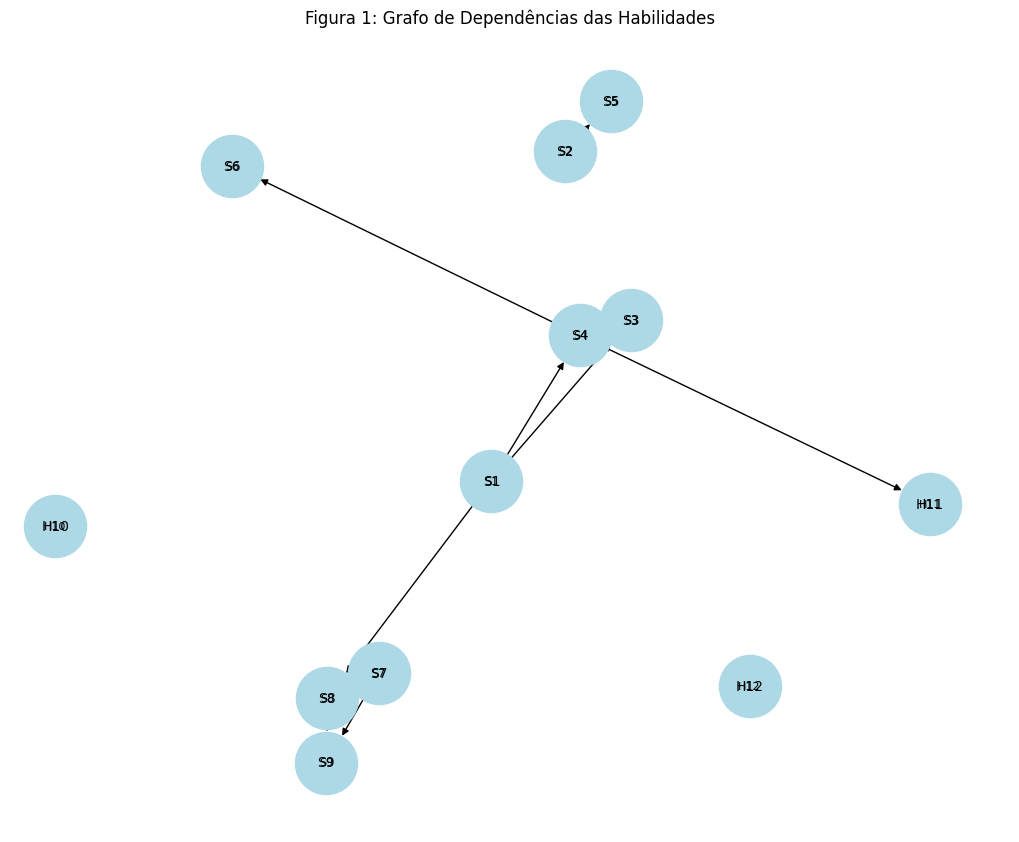

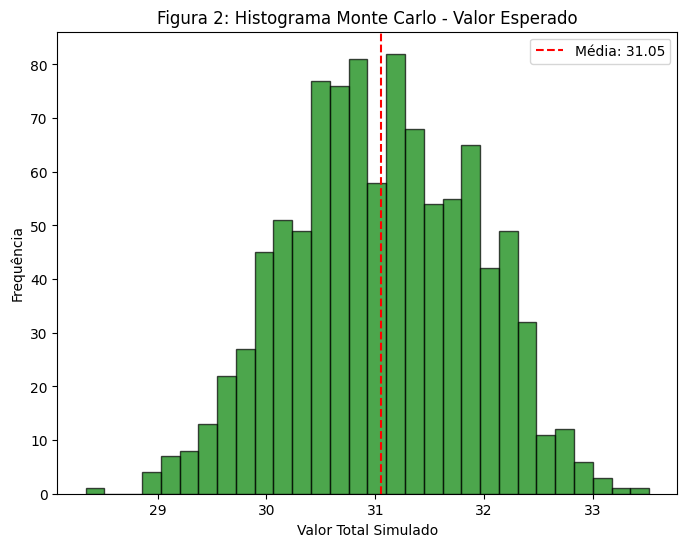

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

!pip install networkx matplotlib

# Figura 1: Grafo de Dependências
G = nx.DiGraph()
for skill, data in skills.items():
    G.add_node(skill, label=data['Nome'])
    for prereq in data['Pre_Reqs']:
        G.add_edge(prereq, skill)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrows=True)
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=8)
plt.title("Figura 1: Grafo de Dependências das Habilidades")
plt.savefig('figura1.png')
plt.show()

# Figura 2: Histograma Monte Carlo
plt.figure(figsize=(8, 6))
plt.hist(values_mc, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=sum(values_mc)/len(values_mc), color='red', linestyle='--', label=f'Média: {sum(values_mc)/len(values_mc):.2f}')
plt.title("Figura 2: Histograma Monte Carlo - Valor Esperado")
plt.xlabel("Valor Total Simulado")
plt.ylabel("Frequência")
plt.legend()
plt.savefig('figura2.png')
plt.show()